# Лабораторная работа 2
## Очистка и подготовка данных

При анализе и моделировании данных значительная часть времени уходит на подготовку данных: загрузку, очистку, преобразование и реорганизацию. 

По некоторым подсчетам это составляет 80% и даже более времени работы аналитика. 

Библиотека Pandas дополняет стандартную библиотеку Python высокоуровневыми, гибкими и производительными базовыми преобразованиями и алгоритмами, которые позволяют переформатировать данные без особых проблем. 

### 1. Обработка отсутствующих данных
Типичное явление в большинстве аналитических приложений – это отсутствующие данные. 

Для представления отсутствующих данных с плавающей точкой в Pandas используется значение NaN (не число). Это просто признак, который легко распознать. Встроенное в Python значение None также рассматривается как отсутствующее в массивах объектов. 

В процессе обработки и подготовки данных важно анализировать сами отсутствующие данные, чтобы выявить проблемы, относящиеся к их сбору, или потенциальное смещение, вызванное отсутствием данных.

В таблице 1 приведен перчен некоторых функций, относящихся к обработке отсутствующих данных.

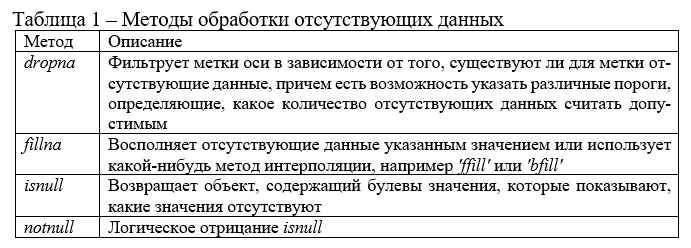

Создадим объект типа Series содержащий ошибки и пропуски в данных.

In [1]:
# Импортируем необходимые библиотеки с указанием алиаса
import pandas as pd
import numpy as np

In [ ]:
# создаем объект
data = pd.Series(['a', 'b', None, 'd', np.nan, 'f'])

In [ ]:
# просмотрим, что получилось
data

In [ ]:
# dозвратbv объект, содержащий булевы значения, которые показывают, какие значения отсутствуют
data.isnull()

### 2. Фильтрация отсутствующих данных
Фильтрацию отсутствующих данных можно осуществлять и вручную с помощью функции Pandas.isnull() и булева индексирования, но более удобен метод dropna(). 

Для Series он возвращает другой объект Series, содержащий только данные и значения индекса, отличные от None. 


In [ ]:
data.dropna()

Это эквивалентно коду:

In [ ]:
data[data.notnull()]

В случае объектов DataFrame все несколько сложнее. 

Можно отбрасывать строки или столбцы, если они содержат только отсутствующие или хотя бы одно отсутствующее значение. 

По умолчанию метод dropna() отбрасывает все строки, содержащие хотя бы одно отсутствующее значение.

In [ ]:
# считаем данные
# и узнаем объем данных
#при необходимости путь к данным нужно поменять
df = pd.read_csv('scoring_eng.csv')
df.shape

In [ ]:
#удалим строки, содержащие хотя бы одно пропущенное значение
df.dropna()

Если передать параметр how='all', то будут отброшены строки, которые целиком состоят из отсутствующих значений. 

In [ ]:
from numpy import nan as NA
#создадим объект, содержащий пустые строки
data = pd.DataFrame([['a', 'b', 'c'], ['d', NA, NA], [NA, NA, NA], ['j', 'k', 'l']])
#просмотрим результат
data

In [ ]:
#отбросим строки, которые целиком состоят из отсутствующих значений
cleaned=data.dropna(how='all')
cleaned 

Для отбрасывания столбцов достаточно передать параметр axis=1 или columns.

In [ ]:
cleaned.dropna(axis=1)

### 3. Восполнение отсутствующих данных
Иногда отсутствующие данные желательно не отфильтровывать (и потенциально вместе с ними отбрасывать полезные данные), а каким-то способом заполнить «дыры». 

В большинстве случаев для этой цели можно использовать метод fillna(). 

Ему передается константа, подставляемая вместо отсутствующих значений.

In [ ]:
#создадим объект, содержащий пропущенные значения
data = pd.Series(['1', '2', None, '4', np.nan])
#смотрим, что получилось
data

In [ ]:
#заполним отсустствующие значения нулями и просмотрим результат
data = data.fillna(0)
data

Если передать методу fillna() словарь, то можно будет подставлять вместо отсутствующих данных значение, зависящее от столбца.

In [ ]:
#создадим объект, содержащий пропущенные значения
from numpy import nan as NA
data = pd.DataFrame([['a', 'b', 'c'], ['d', NA, NA], [NA, NA, NA], ['j', 'k', 'l']])
#смотрим, что получилось
data

In [ ]:
#заполняем пропущенные значения в зависимости от столбца
data = data.fillna({0: 'один', 1: 'два', 2: 'три',})
#смотрим, что получилось
data

Методы интерполяции, которые применяются для переиндексации, подходят и для fillna(). 

In [ ]:
df = df.fillna({'ВИД_ДЕЯТЕЛЬНОСТИ': 'ничего не делаю'})
#смотрим, что получилось
df

При некоторой изобретательности можно использовать fillna() и другими способами, например, передать среднее или медиану объекта Series.

In [ ]:
df.fillna({'ЛИЧНЫЙ_ДОХОД': df.ЛИЧНЫЙ_ДОХОД.mean()})

### 4. Устранение дубликатов
Строки-дубликаты могут появиться в объекте DataFrame по разным причинам. 

Метод duplicated() объекта DataFrame возвращает булев объект Series, который для каждой строки показывает, есть в ней дубликаты или нет. 

А метод drop_duplicates() возвращает DataFrame, для которого массив, возвращенный методом duplicated(), будет содержать только значения False. 

По умолчанию оба метода принимают во внимание все столбцы, но можно указать произвольное подмножество столбцов, которые необходимо исследовать на наличие дубликатов. 

По умолчанию методы duplicated() и drop_duplicates() оставляют первую встретившуюся строку с данной комбинацией значений. Но если задать параметр keep='last', то будет оставлена последняя строка.


In [ ]:
#создадим объект и посмотрим, что получилось
duble = pd.Series(['первый','второй','третий','первый','третий'])
duble

In [ ]:
#устраним дубликаты
duble.drop_duplicates()

In [15]:
#считаем датасет scoring_eng.csv в переменную df
#при необходимости путь к данным нужно поменять
df = pd.read_csv('scoring_eng.csv')

In [ ]:
#устраним дубликаты в столбце "Семейное_положение"
df.drop_duplicates('СЕМЕЙНОЕ_ПОЛОЖЕНИЕ')

In [ ]:
#устраним дубликаты комбниций столбцов "Семейное_положение" и "Тип_организации"
df.drop_duplicates(subset={'СЕМЕЙНОЕ_ПОЛОЖЕНИЕ', 'ТИП_ОРГАНИЗАЦИИ'})

### 5. Замена значений
Восполнение отсутствующих данных методом fillna() можно рассматривать как частный случай более общей замены значений. 
Для замены одних значений на другие в общем случае используется метод replace(), который предлагает простой и гибкий интерфейс.


In [8]:
#считывем данные в переменную df
#при необходимости путь к данным нужно поменять
df = pd.read_csv('scoring_eng.csv')

In [ ]:
#заменяем значение "Индивижуальный предприниматель" на "ИП"
df.replace('Индивидуальный предприниматель', 'ИП')

Чтобы заменить сразу несколько значений, нужно передать их спи-сок и заменяющее значение. Если для каждого заменяемого значения нужно свое заменяющее, передаем список замен. В аргументе можно передавать также словарь.

In [ ]:
# в поле пол значение "0" заменим на "муж", а значение "1" на "жен"
df.ПОЛ = df.ПОЛ.replace({0: 'муж', 1: 'жен'})
df

### 6. Дискретизация и раскладывание
Непрерывные данные часто дискретизируются или как-то иначе раскладываются по интервалам для дальнейшего анализа. 

Например, данные о группе лиц в некотором исследовании требуется рассматривать в зависимости от определенной возрастной группы – дискретной величине. 

Для разбиения данных количественных (или подвергающихся счету) в Pandas существует метод cut(). Он разделяет количественную переменную на, так называемые, bin's - интервалы некой заданной длины, которые представляют собой категориальные переменные. 

Pandas возвращает специальный объект Categorical, который содержит массив categories, в котором хранятся неповторяющиеся имена категорий. 


In [26]:
#снова считываем данные в исходном виде  в переменную df 
#при необходимости путь к данным нужно поменять
df = pd.read_csv('scoring_eng.csv')

In [ ]:
#выведем описательную статистику дял анализа данных
df.ВОЗРАСТ.describe()

In [ ]:
#разобъем данные столбца "Возраст" на интервалы 
pd.cut(df.ВОЗРАСТ, [20,30,40,50,60,
                   70,80,90])

Согласно принятой в математике нотации интервалов, круглая скобка означает, что соответствующий конец не включается (открыт), а квадратная – что включается (замкнут). 

Чтобы сделать открытым правый конец, следует задать параметр right=False.

In [ ]:
pd.cut(df.ВОЗРАСТ, [20,30,40,50,60,70,80,90],right=False)

Можно самостоятельно задать имена категорий, передав список или массив в параметре labels. 

Например, так:

In [34]:
df.ВОЗРАСТ = pd.cut(df.ВОЗРАСТ, [20,40,60,80,90], labels=['молодые', 'зрелые', 'пожилые', 'старые'])

In [ ]:
#смотрим, что получилось
df

Если передать методу cut() целое число категорий, а не явно за-данные границы, то он разобьет данные на группы равной длины исходя из минимального и максимального значений.

In [ ]:
pd.cut(df.ВОЗРАСТ, 4)

Родственный метод qcut() раскладывает данные исходя из выборочных квантилей. 

И если метод cut(), как правило, создает группы, содержащие разное число данных, то, поскольку qcut() пользуется выбо-рочными квантилями, то по определению при его использовании получаются группы равного размера. 

Если, например, требуется, чтобы данные разбились на квартили – (0-25%), (25-50%], (50-70%], (75-100%), нужно просто указать 4 интервала:

In [10]:
df.ВОЗРАСТ = pd.qcut(df.ВОЗРАСТ, 4, precision=2)
#Параметр precision=2 означает, что числа следует выводить с дву-мя десятичными знаками после точки.

In [ ]:
#смотрим, что получилось
df

А теперь попробуем не просто разделить данные на 4 квартиля, а создать признак квартиль и преобразовать его в фиктивную переменную.

In [17]:
#при необходимости путь к данным нужно поменять
df = pd.read_csv('scoring_eng.csv')

In [ ]:
df2['КВАРТИЛЬ'] = pd.qcut(df.ВОЗРАСТ, 4)
#смотрим, что получилось
df2

Метод concat() конкатенирует объекты по оси.

In [20]:
df3 = pd.concat([df, df2], axis=1)

Метод get_dummies() используется для манипулирования данными. Он преобразует категориальные данные в фиктивные или индикаторные переменные.

In [ ]:
df4=pd.get_dummies(df2)
#смотрим, что получилось
df4

In [22]:
df5 = pd.concat([df, df4], axis=1)

In [ ]:
#смотрим, что получилось
df5

### 7. Обнаружение и фильтрация выбросов
Фильтрация или преобразование выбросов сводится к применению операций с массивами. 

Например, найти в одном из столбцов значения, удовлетворяющие заданному условию. 

Чтобы в столбце возраст найти значения, превышающие 65, нужно написать такой код:


In [ ]:
age=df['ВОЗРАСТ']
age[age>65]

Следующий код возвращает строки, в которых встречаются искомые значения:

In [ ]:
df[(df['ВОЗРАСТ']>65)]

### 8. Случайная выборка данных
Чтобы выбрать случайное подмножество без возвращения, можно использовать метод sample(). 

Чтобы сгенерировать выборку с возвращением (когда разрешается выбирать один и тот же элемент несколько раз), передайте методу sample() аргумент replace=True.


In [ ]:
#снова считываем данные в исходном виде  в переменную df 
#при необходимости путь к данным нужно поменять
df = pd.read_csv('scoring_eng.csv')

In [ ]:
# n - сколько объектов вернуть в штуках
sample = df.sample(n=5)
sample

In [23]:
#снова считываем данные в исходном виде  в переменную df 
#при необходимости путь к данным нужно поменять
df = pd.read_csv('scoring_eng.csv')

In [ ]:
# frac - сколько объектво вернуть в % (0.1=10%)
sample = df.sample(frac=0.1)
sample